<a href="https://colab.research.google.com/github/Fazril1/Machine-Learning/blob/main/Tugas-Tugas/Tugas%20Minggu%206/K-Means%20Clustering%20menggunakan%20google%20colab%20dengan%20dataset%20lainnya/K%20Means%20Clustering%20Dengan%20Dataset%20Lainnya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ibnu Fazril 1103201241 Tugas ke-6 K-Means Clustering Dengan Dataset Lainnya

In [1]:
from google.colab import drive # Panggil modul drive dari daftar pustaka google collab untuk mengakses google drive
drive.mount('/content/drive') # Lokasi Direktori yang akan diakses
import pandas as pd # Panggil modul pandas untuk membaca dataframe dan menganalisis data
from sklearn.preprocessing import LabelEncoder # Panggil modul label encoder dari daftar pustaka sklearn.preprocessing untuk menggunakan fitur polynomial dan preprocessing data ke bentuk yang bisa diolah oleh python
import matplotlib.pyplot as plt # Panggil modul matplotlib.pyplot untuk memvisualisasikan sebaran data ke dalam grafik
from sklearn.cluster import KMeans # Panggil modul KMeans dari daftar pustaka sklearn.cluster untuk menggunakan K-Means Clustering
from sklearn.metrics import silhouette_score # Panggil modul silhouette_score dari daftar pustaka sklearn.metrics untuk melihat kualitas pengelompokkan klustering
import numpy as np # Panggil modul numpy untuk penjumlahan aritmatika
from sklearn.metrics import davies_bouldin_score # Panggil modul davies_bouldin_score dari daftar pustaka sklearn.metrics untuk menggunakan matriks evaluasi davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score # Panggil modul calinski_harabasz_score dari daftar pustaka sklearn.metrics untuk menggunakan matriks evaluasi calinski_harabasz_score

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/Dataset/laptop_price.csv' # Lokasi file dataset di Google Drive

df = pd.read_csv(file_path, encoding='ISO-8859-1') # Membaca dataset CSV ke dalam DataFrame dan merubah format data dengan encoding agar data bisa diuraikan

print(df.head()) # Menampilkan beberapa baris pertama dataset

   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   

In [3]:
print(df.head()) # Menampilkan beberapa baris pertama dataset

   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   

In [4]:
df.drop(['laptop_ID'], inplace=True, axis=1) # Hapus kolom laptop_ID
df.drop(['Inches'], inplace=True, axis=1) # Hapus kolom Inches
print(df.head()) # Menampilkan beberapa baris pertama dataset

  Company      Product   TypeName                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook                            1440x900   
2      HP       250 G6   Notebook                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  
0  Intel Iris Plus Graphics 640  macOS  1.37kg      1339.69  
1        Intel HD Graphics 6000  macOS  1.34kg       898.94  
2         Inte

In [5]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder() # Panggil fungsi LabelEncoder() dan simpan dalam variabel label_encoder untuk mengubah parameter dalam dataset menjadi bentuk float/int

# Preprocessing data
df['Company'] = label_encoder.fit_transform(df['Company']) # mengubah paramter string menjadi float
df['Product'] = label_encoder.fit_transform(df['Product']) # mengubah paramter string menjadi float
df['TypeName'] = label_encoder.fit_transform(df['TypeName']) # mengubah paramter string menjadi float
df['ScreenResolution'] = label_encoder.fit_transform(df['ScreenResolution']) # mengubah paramter string menjadi float
df['Cpu'] = label_encoder.fit_transform(df['Cpu']) # mengubah paramter string menjadi float
df['Ram'] = label_encoder.fit_transform(df['Ram']) # mengubah paramter string menjadi float
df['Memory'] = label_encoder.fit_transform(df['Memory']) # mengubah paramter string menjadi float
df['Gpu'] = label_encoder.fit_transform(df['Gpu']) # mengubah paramter string menjadi float
df['OpSys'] = label_encoder.fit_transform(df['OpSys']) # mengubah paramter string menjadi float
df['Weight'] = label_encoder.fit_transform(df['Weight']) # mengubah paramter string menjadi float

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

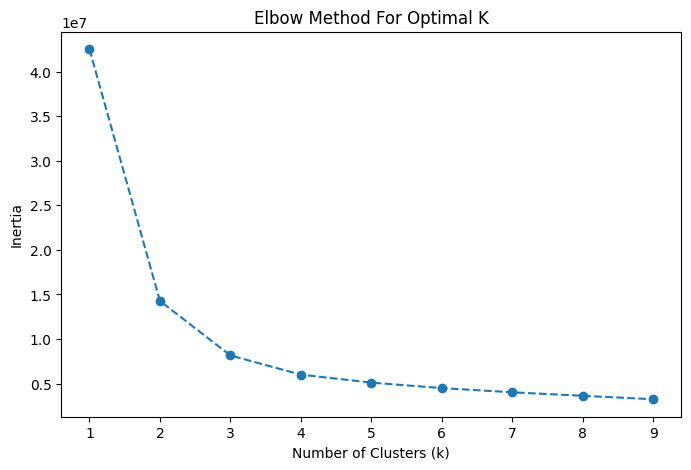

In [6]:
X = df[['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']] # Memilih atribut yang akan digunakan dalam analisis kluster

max_k = 10 # Set nilai max_k ke 10

inertia = [] # Menginisialisasi list untuk menyimpan inersia (inertia) untuk setiap nilai k

for k in range(1, max_k): # Melakukan analisis elbow untuk nilai k dari 1 hingga max_k
    kmeans = KMeans(n_clusters=k, random_state=0) # Membuat model K-Means dengan k kluster
    kmeans.fit(X) # Lakukan prediksi K-Means berdasarkan variabel x dan labels g
    inertia.append(kmeans.inertia_) # Menyimpan nilai inertia ke dalam list

# Memvisualisasikan elbow method
plt.figure(figsize=(8, 5)) # Memplotkan figure dengan ukuran lebar 8 inci dan tinggi 5 inci
plt.plot(range(1, max_k), inertia, marker='o', linestyle='--') # Buat line berupa garis 'putus-putus' dengan simbol 'o' dengan jangkauan 1 sampai max_k
plt.title('Elbow Method For Optimal K') # Menulis judul dengan nama Elbow Method For Optimal K
plt.xlabel('Number of Clusters (k)') # Menulis label 'x' (yang di bawah) dengan nama Number of Clusters (k)
plt.ylabel('Inertia') # Menulis label 'y' (yang di kiri) dengan nama Inertia
plt.xticks(range(1, max_k)) # Jangkauan nilai plot hanya dari 1 sampai max_k
plt.show() # Tampilkan figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


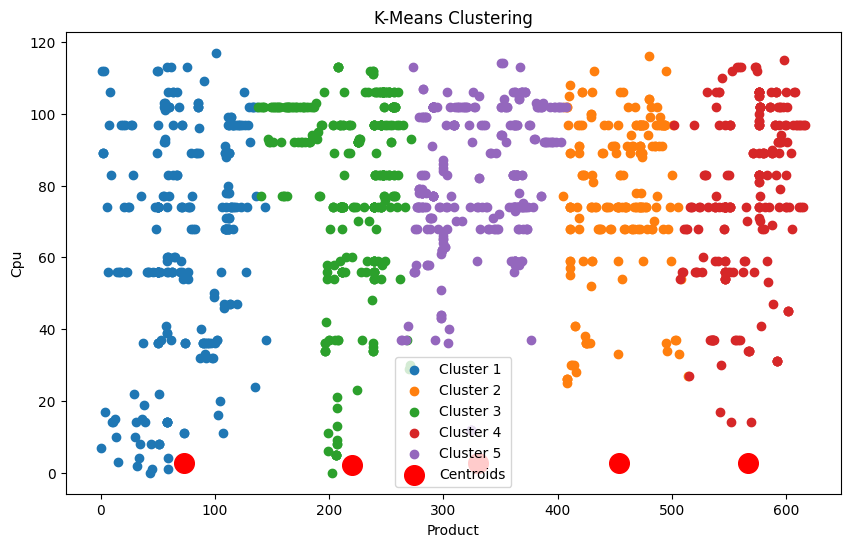

In [7]:
kmeans = KMeans(n_clusters=5, random_state=0) # Membuat model K-Means dengan 5 kluster

df['label'] = kmeans.fit_predict(X) # Melakukan klustering dan menambahkan kolom 'label' ke DataFrame

# Memvisualisasikan hasil klustering
plt.figure(figsize=(10, 6)) # Memplotkan figure dengan ukuran lebar 10 inci dan tinggi 6 inci

# Menggunakan scatter plot untuk visualisasi
plt.scatter(df[df['label'] == 0]['Product'], df[df['label'] == 0]['Cpu'], label='Cluster 1') # Pengelompokkan cluster berdasarkan nilai Product dan Cpu
plt.scatter(df[df['label'] == 1]['Product'], df[df['label'] == 1]['Cpu'], label='Cluster 2') # Pengelompokkan cluster berdasarkan nilai Product dan Cpu
plt.scatter(df[df['label'] == 2]['Product'], df[df['label'] == 2]['Cpu'], label='Cluster 3') # Pengelompokkan cluster berdasarkan nilai Product dan Cpu
plt.scatter(df[df['label'] == 3]['Product'], df[df['label'] == 3]['Cpu'], label='Cluster 4') # Pengelompokkan cluster berdasarkan nilai Product dan Cpu
plt.scatter(df[df['label'] == 4]['Product'], df[df['label'] == 4]['Cpu'], label='Cluster 5') # Pengelompokkan cluster berdasarkan nilai Product dan Cpu

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', label='Centroids') # Membuat centroid
plt.title('K-Means Clustering') # Menulis judul dengan nama K-Means Clustering
plt.xlabel('Product') # Menulis label 'x' (yang di bawah) dengan nama Annual Income
plt.ylabel('Cpu') # Menulis label 'y' (yang di kiri) dengan nama Spending Score
plt.legend() # Tampilkan guide tentang plot
plt.show() # Tampilkan figure


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


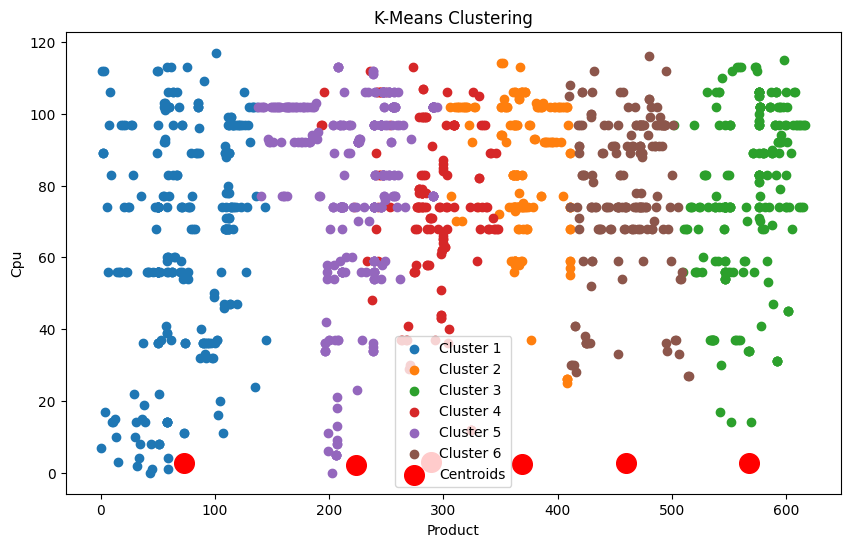

In [8]:
kmeans = KMeans(n_clusters=6, random_state=0) # Membuat model K-Means dengan 6 kluster

df['label'] = kmeans.fit_predict(X) # Melakukan klustering dan menambahkan kolom 'label' ke DataFrame

plt.figure(figsize=(10, 6)) # Memplotkan figure dengan ukuran lebar 10 inci dan tinggi 6 inci

# Menggunakan scatter plot untuk visualisasi
plt.scatter(df[df['label'] == 0]['Product'], df[df['label'] == 0]['Cpu'], label='Cluster 1') # Pengelompokkan cluster berdasarkan nilai Product dan Cpu
plt.scatter(df[df['label'] == 1]['Product'], df[df['label'] == 1]['Cpu'], label='Cluster 2') # Pengelompokkan cluster berdasarkan nilai Product dan Cpu
plt.scatter(df[df['label'] == 2]['Product'], df[df['label'] == 2]['Cpu'], label='Cluster 3') # Pengelompokkan cluster berdasarkan nilai Product dan Cpu
plt.scatter(df[df['label'] == 3]['Product'], df[df['label'] == 3]['Cpu'], label='Cluster 4') # Pengelompokkan cluster berdasarkan nilai Product dan Cpu
plt.scatter(df[df['label'] == 4]['Product'], df[df['label'] == 4]['Cpu'], label='Cluster 5') # Pengelompokkan cluster berdasarkan nilai Product dan Cpu
plt.scatter(df[df['label'] == 5]['Product'], df[df['label'] == 5]['Cpu'], label='Cluster 6') # Pengelompokkan cluster berdasarkan nilai Product dan Cpu

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', label='Centroids')  # Membuat centroid
plt.title('K-Means Clustering') # Menulis judul dengan nama K-Means Clustering
plt.xlabel('Product') # Menulis label 'x' (yang di bawah) dengan nama Annual Income
plt.ylabel('Cpu') # Menulis label 'y' (yang di kiri) dengan nama Spending Score
plt.legend() # Tampilkan guide tentang plot
plt.show() # Tampilkan figure


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.53
Silhouette Score for k=3: 0.48
Silhouette Score for k=4: 0.42
Silhouette Score for k=5: 0.36
Silhouette Score for k=6: 0.37
Silhouette Score for k=7: 0.34
Silhouette Score for k=8: 0.34
Silhouette Score for k=9: 0.34
Silhouette Score for k=10: 0.34


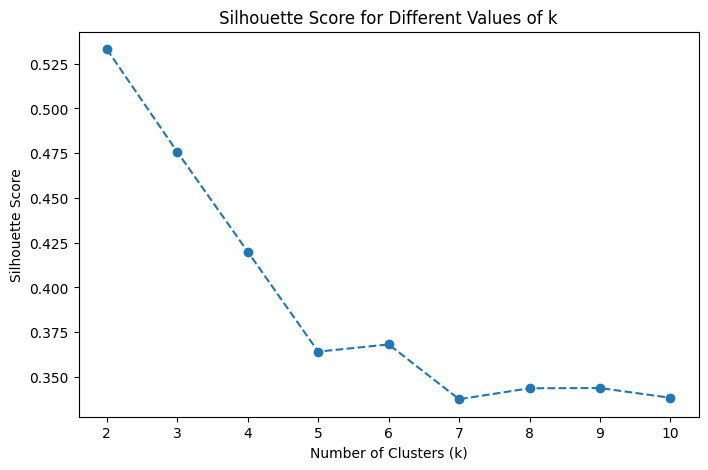

In [9]:
silhouette_scores = [] # Membuat list untuk menyimpan nilai Silhouette Score

for k in range(2, 11): # Melakukan analisis kluster untuk nilai k dari 2 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=0) # Membuat model K-Means dengan K kluster
    labels = kmeans.fit_predict(X) # Simpan prediksi K-Means ke variabel labels
    silhouette_avg = silhouette_score(X, labels) # Simpan Silhoutte Score berdasarkan variabel x dan labels ke variabel silhouette_avg
    silhouette_scores.append(silhouette_avg) # Menyimpan nilai Silhouette Score ke dalam list

for k, score in zip(range(2, 11), silhouette_scores): # Melakukan perulangan nilai Silhouette Score untuk masing-masing k
    print(f'Silhouette Score for k={k}: {score:.2f}') # Menampilkan nilai Silhoutte Score

# Memvisualisasikan Silhouette Score
plt.figure(figsize=(8, 5)) # Memplotkan figure dengan ukuran lebar 8 inci dan tinggi 5 inci
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--') # Buat line berupa garis 'putus-putus' dengan simbol 'o' dengan jangkauan 2 sampai 10
plt.title('Silhouette Score for Different Values of k') # Menulis judul dengan nama Silhouette Score for Different Values of k
plt.xlabel('Number of Clusters (k)') # Menulis label 'x' (yang di bawah) dengan nama Number of Clusters (k)
plt.ylabel('Silhouette Score') # Menulis label 'y' (yang di kiri) dengan nama Silhouette Score
plt.xticks(range(2, 11)) # Jangkauan nilai plot hanya dari 2 sampai 10
plt.show() # Tampilkan figure


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 0.66
Davies-Bouldin Index for k=3: 0.71
Davies-Bouldin Index for k=4: 0.82
Davies-Bouldin Index for k=5: 0.97
Davies-Bouldin Index for k=6: 0.96
Davies-Bouldin Index for k=7: 1.04
Davies-Bouldin Index for k=8: 1.01
Davies-Bouldin Index for k=9: 0.99
Davies-Bouldin Index for k=10: 1.03


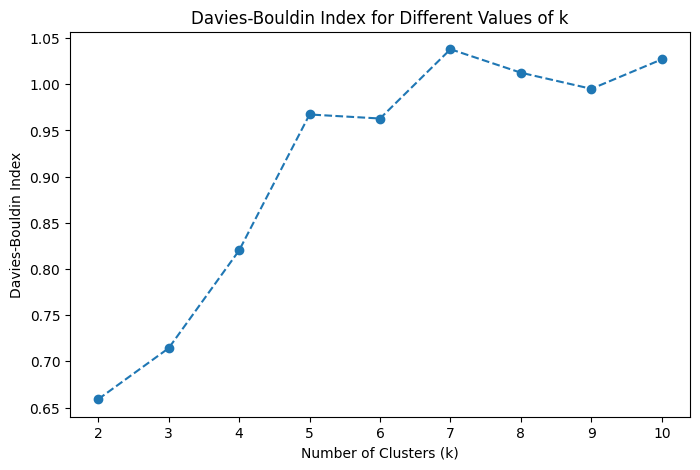

In [10]:
dbi_scores = [] # Membuat list untuk menyimpan nilai Davies-Bouldin Index

for k in range(2, 11): # Melakukan analisis kluster untuk nilai k dari 2 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=0) # Membuat model K-Means dengan K kluster
    labels = kmeans.fit_predict(X) # Simpan prediksi K-Means ke variabel labels
    dbi = davies_bouldin_score(X, labels) # Simpan davies bouldin score berdasarkan variabel x dan labels ke variabel dbi
    dbi_scores.append(dbi) # Menyimpan nilai dbi scores ke dalam list

for k, score in zip(range(2, 11), dbi_scores): # Melakukan perulangan nilai Davies-Bouldin Index untuk masing-masing k
    print(f'Davies-Bouldin Index for k={k}: {score:.2f}') # Menampilkan nilai Davies-Bouldin Index

# Memvisualisasikan Davies-Bouldin Index
plt.figure(figsize=(8, 5)) # Memplotkan figure dengan ukuran lebar 8 inci dan tinggi 5 inci
plt.plot(range(2, 11), dbi_scores, marker='o', linestyle='--') # Buat line berupa garis 'putus-putus' dengan simbol 'o' dengan jangkauan 2 sampai 10
plt.title('Davies-Bouldin Index for Different Values of k') # Menulis judul dengan nama Davies-Bouldin Index for Different Values of k
plt.xlabel('Number of Clusters (k)') # Menulis label 'x' (yang di bawah) dengan nama Number of Clusters (k)
plt.ylabel('Davies-Bouldin Index') # Menulis label 'y' (yang di kiri) dengan nama Davies-Bouldin Index
plt.xticks(range(2, 11)) # Jangkauan nilai plot hanya dari 2 sampai 10
plt.show() # Tampilkan figure


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2: 2575.63
Calinski-Harabasz Index for k=3: 2739.63
Calinski-Harabasz Index for k=4: 2636.41
Calinski-Harabasz Index for k=5: 2379.59
Calinski-Harabasz Index for k=6: 2198.15
Calinski-Harabasz Index for k=7: 2071.65
Calinski-Harabasz Index for k=8: 1985.57
Calinski-Harabasz Index for k=9: 1961.60
Calinski-Harabasz Index for k=10: 1899.95


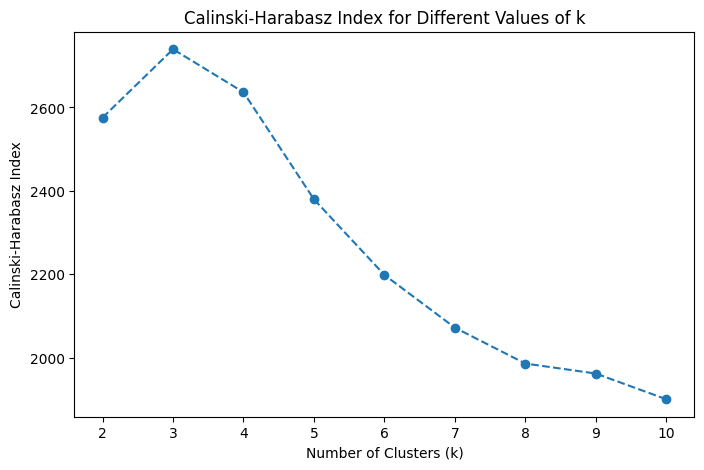

In [11]:
chi_scores = [] # Membuat list untuk menyimpan nilai Calinski-Harabasz Index

for k in range(2, 11): # Melakukan analisis kluster untuk nilai k dari 2 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=0) # Membuat model K-Means dengan K kluster
    labels = kmeans.fit_predict(X) # Simpan prediksi K-Means ke variabel labels
    chi = calinski_harabasz_score(X, labels) # Simpan calinski harabasz score berdasarkan variabel x dan labels ke variabel chi
    chi_scores.append(chi) # Menyimpan nilai chi scores ke dalam list

for k, score in zip(range(2, 11), chi_scores): # Melakukan perulangan nilai Calinski-Harabasz Index untuk masing-masing k
    print(f'Calinski-Harabasz Index for k={k}: {score:.2f}') # Menampilkan nilai Calinski-Harabasz Index

# Memvisualisasikan Calinski-Harabasz Index
plt.figure(figsize=(8, 5)) # Memplotkan figure dengan ukuran lebar 8 inci dan tinggi 5 inci
plt.plot(range(2, 11), chi_scores, marker='o', linestyle='--') # Buat line berupa garis 'putus-putus' dengan simbol 'o' dengan jangkauan 2 sampai 10
plt.title('Calinski-Harabasz Index for Different Values of k') # Menulis judul dengan nama Calinski-Harabasz Index for Different Values of k
plt.xlabel('Number of Clusters (k)') # Menulis label 'x' (yang di bawah) dengan nama Number of Clusters (k)
plt.ylabel('Calinski-Harabasz Index') # Menulis label 'y' (yang di kiri) dengan nama Calinski-Harabasz Index
plt.xticks(range(2, 11)) # Jangkauan nilai plot hanya dari 2 sampai 10
plt.show() # Tampilkan figure
